#  <span style="color:red">How Precious</span>

# Project Overview
**Date Updated: May 15, 2021**

For thisproject we will use the diamonds dataset based on a case study called **"How Precious is a Diamond?"**. The data contains 53940 records for training. Short descriptions of the business meaning of each column in the data is as below:

##  Dataset for this project

In this project we will follow below steps:

**carat:** The carat value of the Diamond

**cut:** The cut type of the Diamond, it determines the shine (Ideal' 'Premium' 'Good' 'Very Good' 'Fair')

**color:** The color value of the Diamond ('E' 'I' 'J' 'H' 'F' 'G' 'D')

**clarity:** The carat type of the Diamond ('SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1')

**depth:** The depth value of the Diamond

**table:** Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.

**x:** Width of the diamond

**y:** Length of the diamond

**z:** Height of the diamond

**price:** The price of the Diamond in USD.


# Getting the data and analysing

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [48]:
dataset = pd.read_csv('../input/diamonds/diamonds.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# Quick check the data

In [49]:
dataset.shape

(53940, 10)

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Exploratory data analysis

In [51]:
profile = ProfileReport(dataset, title="Diamonds Profiling Report")

In [52]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing

In [53]:
dummyCut = pd.get_dummies(dataset['cut'],drop_first=True)
dummyColor = pd.get_dummies(dataset['color'],drop_first=True)
dummyClarity = pd.get_dummies(dataset['clarity'],drop_first=True)
df = pd.concat([dataset,dummyCut,dummyColor,dummyClarity],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335,...,0,0,1,0,0,1,0,0,0,0


In [54]:
df.drop(['cut','color','clarity'],axis=1,inplace=True)
df.head()

,carat,depth,table,x,y,z,price,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,...,0,0,1,0,0,1,0,0,0,0


## Splitting the dataset into the Training set and Test set

In [55]:
X = df.drop('price',axis=1)
y = df['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

# Defining the model
## Ensemble models

### AdaBoostRegressor

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

model = AdaBoostRegressor(base_estimator=None,
                          n_estimators=100,
                          random_state=44)
scores = cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

0.8515925631314344

### RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(max_depth=10,random_state=44)
model.fit(X_train,y_train)

scores = cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

0.9607004976223144

### GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1,
                                  max_depth=10,
                                  random_state=44,
                                  loss='ls')
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[0.97672031 0.9780783  0.97866657 0.97858498 0.9745699 ]


In [60]:
from sklearn import metrics

y_pred = model.predict(X_test)
print(f"SCORE:{model.score(X_test,y_test)}")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

SCORE:0.9795194928995017
MAE: 282.0085869845426
MSE: 330371.87788203475
RMSE: 574.7798516667358


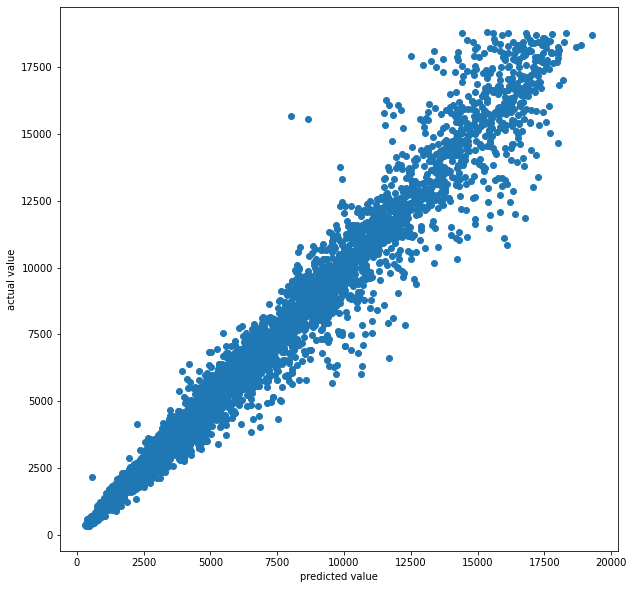

In [61]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,'o')
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

# Single prediction

In [68]:
X_test[1:2]

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
26837,2.01,62.2,58.0,7.99,8.05,4.99,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [69]:
print(model.predict(X_test[1:2]))

[17391.51324672]


In [70]:
print(y_test[1:2])

26837    16737
Name: price, dtype: int64


# Save and reuse model

In [66]:
import pickle
with open('GBR_estimator.pkl', 'wb') as file:
    pickle.dump(model, file)
    
# To deserialize estimator later
with open('GBR_estimator.pkl', 'rb') as file:
    new_model = pickle.load(file)

In [74]:
print(f'Predict Price: {np.round(new_model.predict(X_test[1:2]))}')
print(f'Actual Price : {y_test[1:2].values}')

Predict Price: [17392.]
Actual Price : [16737]


Contact for more:
[R.CALISKAN](www.resulcaliskan.com)